### Intoduction to opencv in python  - 2022 0114 CJH
---
* if you don't have it, get it with `pip install opencv-python`
* https://medium.com/@yukunpengba/comprehensive-python-opencv-tutorial-for-beginners-part-i-fd0293d52241
* color spaces: https://alloyui.com/examples/color-picker/hsv.html or http://colorizer.org/ or 

In [3]:
# !pip install opencv-python

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### the basics - opening images and displaying with matplotlib

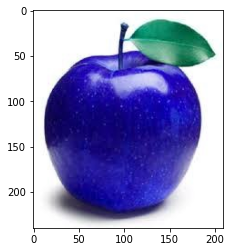

In [5]:
img = cv2.imread('training_images/apple.jpeg')   # Read the image as BGR
plt.imshow(img)   # Ploting the image using matplotlib

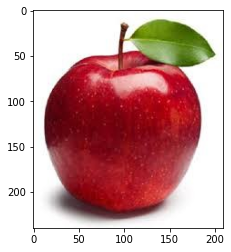

In [6]:
# convert to RGB color convention 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [7]:
# can also pop up a window, wait for the ESC key
#cv2.imshow("image",img_rgb)
#key = cv2.waitKey(0) 
#if key == 27:
#    cv2.destroyAllWindows()

In [8]:
# y is rows, x is columms
print("Image type: ", type(img_rgb))
print("Image data type: ", img_rgb.dtype)
print("Image shape: ", img_rgb.shape)

Image type:  <class 'numpy.ndarray'>
Image data type:  uint8
Image shape:  (240, 210, 3)


### RGB components

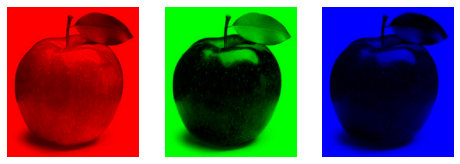

In [9]:
# look at the individual components in RGB space
fix, axs = plt.subplots(ncols=3, nrows=1, figsize=(8,3))
for ix, ax in enumerate(axs):
    temp = np.zeros(img_rgb.shape, dtype='uint8')
    temp[:,:,ix] = img_rgb[:,:,ix]
    ax.imshow(temp)
    ax.set_axis_off()
plt.show()

### HSV components  - note H goes to 180

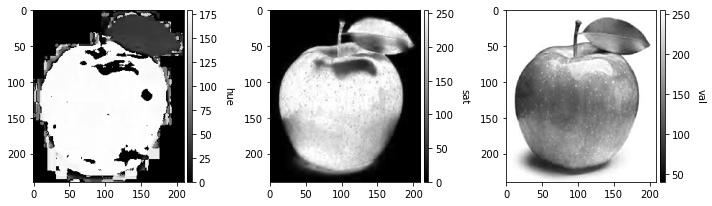

In [10]:
# look at them in HSV space
# look at the individual components in RGB space
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10,4))
divider = [None, None, None]
cax = [None, None, None]
cbar_legend = ['hue', 'sat', 'val']
for ix, ax in enumerate(axs):
    temp = np.zeros(img_hsv.shape[0:2], dtype='uint8')
    temp[:,:] = img_hsv[:,:,ix]
    im = ax.imshow(temp, cmap='gray')
    divider[ix] = make_axes_locatable(ax)
    cax[ix] = divider[ix].append_axes("right", size="3%", pad=0.05)
    cb = plt.colorbar(im, cax=cax[ix])
    cb.ax.set_ylabel(cbar_legend[ix], rotation=270, labelpad=15)
    ax.imshow(temp, cmap='gray')
fig.tight_layout()

### drawing stuff

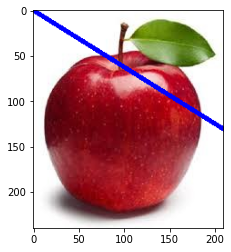

In [30]:
line_img = img_rgb.copy()        # Make a copy of the image
cv2.line(line_img, (0, 0), (240, 150), (0, 0, 255), 3)   # Draw the line: image, start, stop, color, thickness
plt.imshow(line_img)    # show the image

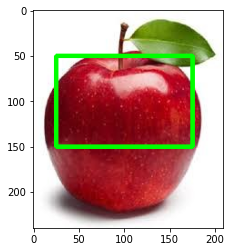

In [12]:
rectangle_img = img_rgb.copy()
cv2.rectangle(rectangle_img, (25, 50), (175, 150), (0, 255, 0), 3)  # Rectangles: image, top left, bot right, color, thickness
plt.imshow(rectangle_img)

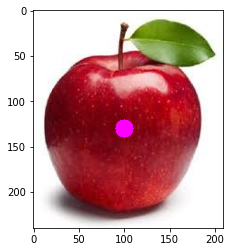

In [13]:
circle_img = img_rgb.copy() 
cv2.circle(circle_img, (100, 130), 10, (255, 0, 255), -1)  # Circle: image, center, radius, color, thickness (neg is filled)
plt.imshow(circle_img)  

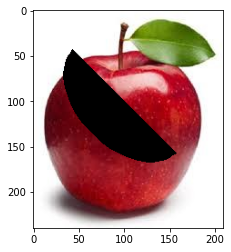

In [14]:
ellipse_img = img_rgb.copy()    
cv2.ellipse(ellipse_img,(100, 100), (80, 50) , 45 , 0, 180, (0, 0, 0), -1) # ellipse: img, center, (a,b), rot, start, stop, color, thick
plt.imshow(ellipse_img)   

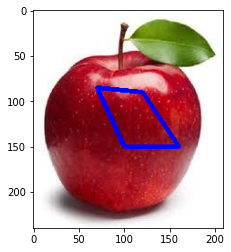

In [33]:
polygon_img = img_rgb.copy()
pts = np.array([[70, 85], [100, 150], [160, 150], [120, 90]], np.int32)      
pts = pts.reshape((-1,1,2))                                    
cv2.polylines(polygon_img, [pts], True,( 0,0,255), 4)  # polygon: image, points, open/closed, color, thickness
plt.imshow(polygon_img)

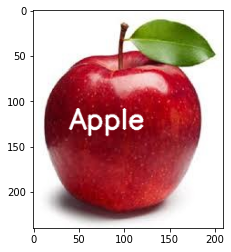

In [24]:
text_img = img_rgb.copy()                
font = cv2.FONT_HERSHEY_SIMPLEX 
textcolor = (255,255,255)
cv2.putText(text_img,'Apple', (40, 130), font, 1, textcolor, 2, cv2.LINE_AA)  # text: img, text, location, font, scale, color, thickness, line type             
plt.imshow(text_img) 

#### two (of many) ways to save images - cv2.imwrite and plt.imsave

In [25]:
# saving with openCV - make sure you switch it back to RGB
# cv2.imwrite("Apple_with_text_opencv.jpg", cv2.cvtColor(text_img, cv2.COLOR_BGR2RGB))

True

In [26]:
# or you could save it with matplotlib
# plt.imsave('Apple_with_text_pyplot.jpg', text_img)